<a href="https://colab.research.google.com/github/Manju1803-a11y/Project_SIC/blob/main/SIC_literacy_rate_predction_084.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer


# Load the Dataset

In [ ]:

df = pd.read_csv("/content/literacy_rate.csv")

df.head()


,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,adult_education_programs,language_diversity,region_type,government_stability,literacy_rate_percent
0,4.847706,70.937794,20098.745559,503.001686,0.526940,35.269097,90.755242,NaN,NaN,Bilingual,Least Developed,High,66.516441
1,7.281657,64.538697,50606.686295,737.794798,0.524418,NaN,90.197009,0.500205,Extensive,Multilingual,Least Developed,NaN,85.431091
2,3.833110,63.533592,53415.197757,NaN,0.855385,16.078349,60.915648,0.921771,NaN,Monolingual,Developing,Low,67.063415
3,NaN,37.964468,10943.100757,343.572155,0.864194,40.721066,28.890170,0.862589,Limited,NaN,Developing,High,58.288996
4,2.697866,74.761894,26233.323359,753.260001,0.932270,38.795291,72.056473,0.682091,Extensive,NaN,Least Developed,Low,87.016369


# Basic Data Analysis

In [ ]:

print("Shape:", df.shape)
df.info()
df.describe()

Shape: (1000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_spending_percent_gdp  948 non-null    float64
 1   urbanization_rate               961 non-null    float64
 2   avg_income_usd                  948 non-null    float64
 3   population_density              948 non-null    float64
 4   school_availability_index       958 non-null    float64
 5   teacher_student_ratio           960 non-null    float64
 6   internet_penetration            956 non-null    float64
 7   gender_equality_index           954 non-null    float64
 8   adult_education_programs        658 non-null    object 
 9   language_diversity              941 non-null    object 
 10  region_type                     932 non-null    object 
 11  government_stability            951 non-null    object 
 12  literacy_rate_per

,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,literacy_rate_percent
count,948.000000,961.000000,948.000000,948.000000,958.000000,960.000000,956.000000,954.000000,948.000000
mean,5.009396,57.323089,31177.070608,524.953319,0.746525,32.969899,53.311175,0.750029,75.104038
std,1.723709,21.397415,17115.832929,280.284891,0.145022,10.081559,25.295793,0.145541,14.485936
min,2.007020,20.136103,1099.270731,10.005536,0.500786,15.027052,10.196043,0.500181,50.077177
25%,3.507264,38.551338,17102.750056,291.553502,0.617672,24.478591,29.711495,0.620443,62.794725
50%,5.040999,56.925740,30303.444986,539.333646,0.746127,33.725627,54.072282,0.751680,75.011285
75%,6.485350,75.290713,46075.592211,754.775633,0.872841,41.501868,75.663187,0.878687,87.564312
max,7.996891,94.992695,59993.965682,998.467278,0.999491,49.953992,94.959967,0.999898,99.969744


# Missing Value Analysis

In [ ]:

df.isnull().sum()


,0
education_spending_percent_gdp,52
urbanization_rate,39
avg_income_usd,52
population_density,52
school_availability_index,42
teacher_student_ratio,40
internet_penetration,44
gender_equality_index,46
adult_education_programs,342
language_diversity,59


# Separate Features and Target

In [ ]:
X = df.drop("literacy_rate_percent", axis=1)
y = df["literacy_rate_percent"]


# Identify Numerical & Categorical Columns

In [ ]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['education_spending_percent_gdp', 'urbanization_rate', 'avg_income_usd',
       'population_density', 'school_availability_index',
       'teacher_student_ratio', 'internet_penetration',
       'gender_equality_index'],
      dtype='object')
Categorical Columns: Index(['adult_education_programs', 'language_diversity', 'region_type',
       'government_stability'],
      dtype='object')


# Data Imputation & Encoding Pipeline

In [ ]:

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


# EDA – Data Visualization
>Literacy Rate Distribution

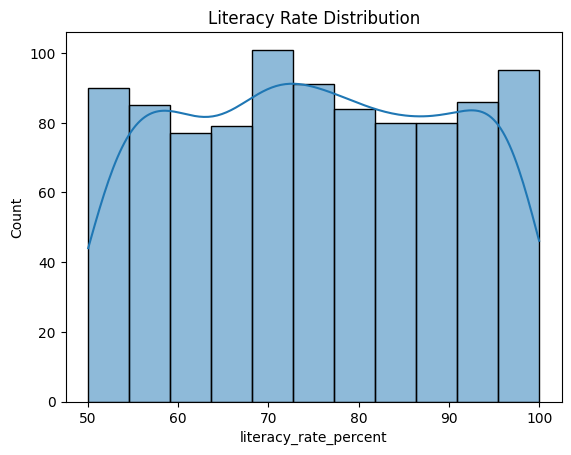

In [ ]:
plt.figure()
sns.histplot(df["literacy_rate_percent"], kde=True)
plt.title("Literacy Rate Distribution")
plt.show()


Literacy vs Income

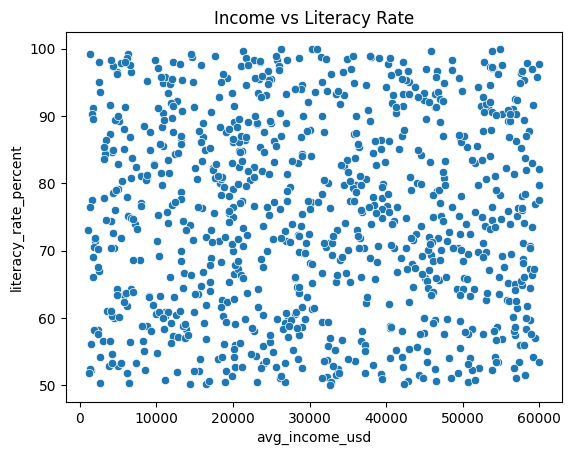

In [ ]:
plt.figure()
sns.scatterplot(x=df["avg_income_usd"], y=df["literacy_rate_percent"])
plt.title("Income vs Literacy Rate")
plt.show()


Correlation Heatmap

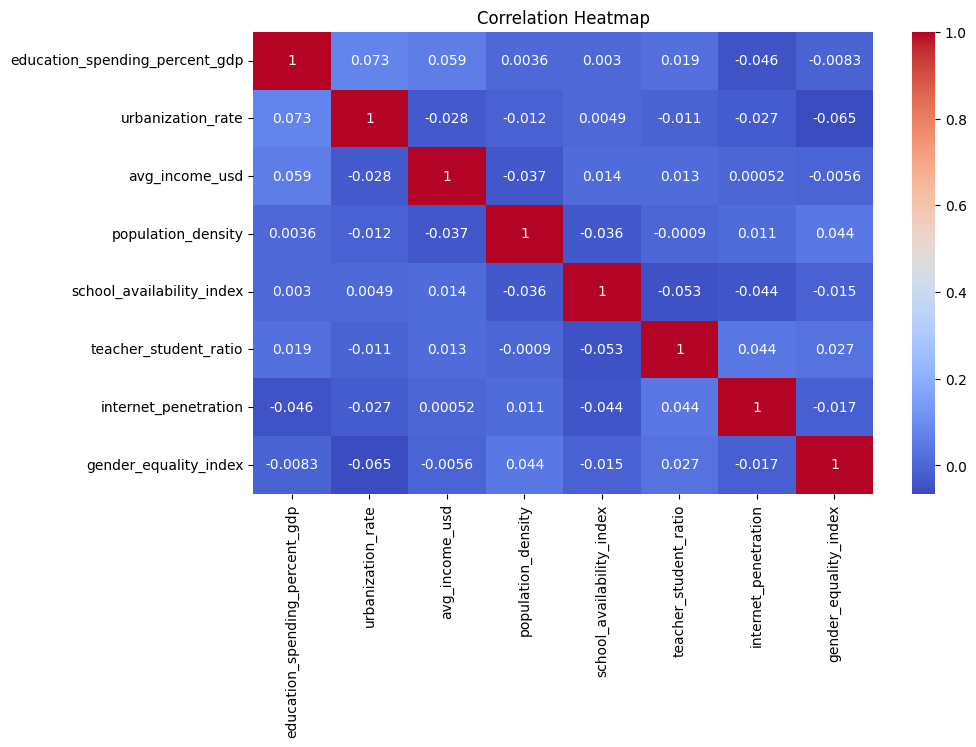

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Regressiom Model
>Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

not_nan_mask_train = ~y_train.isna()
X_train_filtered = X_train[not_nan_mask_train]
y_train_filtered = y_train[not_nan_mask_train]

lin_reg.fit(X_train_filtered, y_train_filtered)


not_nan_mask_test = ~y_test.isna()
X_test_filtered = X_test[not_nan_mask_test]
y_test_filtered = y_test[not_nan_mask_test]

y_pred = lin_reg.predict(X_test_filtered)

print("R2 Score:", r2_score(y_test_filtered, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_filtered, y_pred)))

R2 Score: 0.012893128524348763
RMSE: 14.68702946648382


Rondom Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

rf_reg.fit(X_train_filtered, y_train_filtered)

y_pred_rf = rf_reg.predict(X_test_filtered)

print("Random Forest R2 Score:", r2_score(y_test_filtered, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_filtered, y_pred_rf)))

Random Forest R2 Score: -0.03733051153479838
Random Forest RMSE: 15.056029420621778


Ridge & Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1.0))
])

lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Lasso(alpha=0.01))
])

ridge.fit(X_train_filtered, y_train_filtered)
lasso.fit(X_train_filtered, y_train_filtered)

print("Ridge R2:", ridge.score(X_test_filtered, y_test_filtered))
print("Lasso R2:", lasso.score(X_test_filtered, y_test_filtered))

Ridge R2: 0.0128935962648975
Lasso R2: 0.013007100222303003


Classification Models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


# Random forest

In [ ]:
print(df.isnull().sum())


education_spending_percent_gdp     52
urbanization_rate                  39
avg_income_usd                     52
population_density                 52
school_availability_index          42
teacher_student_ratio              40
internet_penetration               44
gender_equality_index              46
adult_education_programs          342
language_diversity                 59
region_type                        68
government_stability               49
literacy_rate_percent              52
Cluster_KMeans                      0
Literacy_Class                      0
dtype: int64


In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for col in num_cols:
  df[col].fillna(df[col].mean(),inplace=True)
for col in num_cols:
  df[col].fillna(df[col].mode(),inplace=True)
print("\nMissing values after:\n")
print(df.isnull().sum())


Missing values after:

education_spending_percent_gdp      0
urbanization_rate                   0
avg_income_usd                      0
population_density                  0
school_availability_index           0
teacher_student_ratio               0
internet_penetration                0
gender_equality_index               0
adult_education_programs          342
language_diversity                 59
region_type                        68
government_stability               49
literacy_rate_percent               0
Cluster_KMeans                      0
Literacy_Class                      0
dtype: int64


/tmp/ipython-input-2772258052.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
/tmp/ipython-input-2772258052.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
def categorize_literacy(rate):
    if rate < 60:
        return 0
    elif rate < 80:
        return 1
    else:
        return 2

df["Literacy_Class"] = df["literacy_rate_percent"].apply(categorize_literacy)


In [ ]:
X = df.drop(columns=["literacy_rate_percent", "Literacy_Class"])
X = X.select_dtypes(include="number")

# Fill feature NaNs with column mean
X = X.fillna(X.mean())

y = df["Literacy_Class"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=150,
                       random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.465
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.47      0.74      0.58        86
           2       0.45      0.39      0.42        75

    accuracy                           0.47       200
   macro avg       0.31      0.38      0.33       200
weighted avg       0.37      0.47      0.40       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


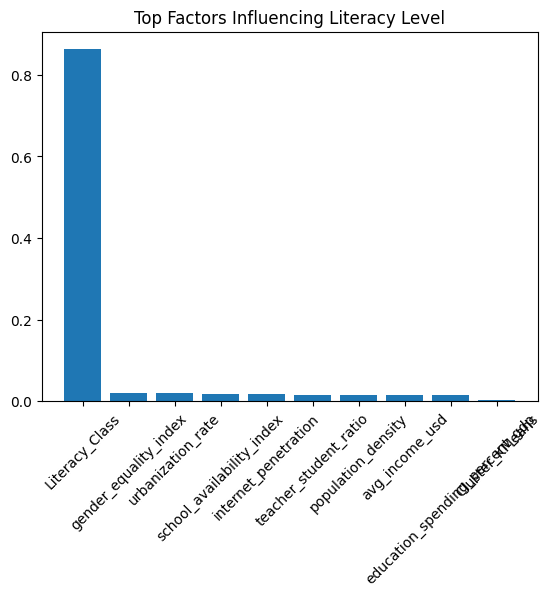

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1][:10]

plt.figure()
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), features[indices], rotation=45)
plt.title("Top Factors Influencing Literacy Level")
plt.show()


# Classification Using Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


Prepare Data for ANN

In [ ]:

# Ensure X contains both numerical and categorical features for the preprocessor
# We use the original num_cols and cat_cols identified earlier for consistency
features_for_ann = list(num_cols) + list(cat_cols)
X_ann = df[features_for_ann]
y_ann = df["Literacy_Class"]

X_processed = preprocessor.fit_transform(X_ann)

y_encoded = pd.get_dummies(y_ann)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42
)


Build ANN Model

In [ ]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train ANN Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3677 - loss: 1.1086 - val_accuracy: 0.4187 - val_loss: 1.0456
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4092 - loss: 1.0498 - val_accuracy: 0.4187 - val_loss: 1.0408
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4634 - loss: 1.0307 - val_accuracy: 0.4500 - val_loss: 1.0398
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4681 - loss: 1.0155 - val_accuracy: 0.4625 - val_loss: 1.0410
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5028 - loss: 1.0063 - val_accuracy: 0.4437 - val_loss: 1.0421
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4849 - loss: 1.0263 - val_accuracy: 0.4437 - val_loss: 1.0451
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5324 - loss: 0.9921 - val_accuracy: 0.4375 - val_loss: 1.0484
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5307 - loss: 1.0010 - val_accuracy: 0.4500 - val_loss

Evaluate ANN Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("ANN Accuracy:", accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4207 - loss: 1.1238  
ANN Accuracy: 0.4099999964237213


# PCA Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:

df = pd.read_csv('/content/literacy_rate.csv')

df.head()


,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,adult_education_programs,language_diversity,region_type,government_stability,literacy_rate_percent
0,4.847706,70.937794,20098.745559,503.001686,0.526940,35.269097,90.755242,NaN,NaN,Bilingual,Least Developed,High,66.516441
1,7.281657,64.538697,50606.686295,737.794798,0.524418,NaN,90.197009,0.500205,Extensive,Multilingual,Least Developed,NaN,85.431091
2,3.833110,63.533592,53415.197757,NaN,0.855385,16.078349,60.915648,0.921771,NaN,Monolingual,Developing,Low,67.063415
3,NaN,37.964468,10943.100757,343.572155,0.864194,40.721066,28.890170,0.862589,Limited,NaN,Developing,High,58.288996
4,2.697866,74.761894,26233.323359,753.260001,0.932270,38.795291,72.056473,0.682091,Extensive,NaN,Least Developed,Low,87.016369


In [ ]:
# Select only numerical columns
X = df.select_dtypes(include=[np.number])

print(X.head())


   education_spending_percent_gdp  urbanization_rate  avg_income_usd  \
0                        4.847706          70.937794    20098.745559   
1                        7.281657          64.538697    50606.686295   
2                        3.833110          63.533592    53415.197757   
3                             NaN          37.964468    10943.100757   
4                        2.697866          74.761894    26233.323359   

   population_density  school_availability_index  teacher_student_ratio  \
0          503.001686                   0.526940              35.269097   
1          737.794798                   0.524418                    NaN   
2                 NaN                   0.855385              16.078349   
3          343.572155                   0.864194              40.721066   
4          753.260001                   0.932270              38.795291   

   internet_penetration  gender_equality_index  literacy_rate_percent  
0             90.755242                    N

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.10969836 0.10314504]
Total Variance Explained: 0.21284340419452863


In [ ]:
pca_df = pd.DataFrame(
    X_pca,
    columns=['Principal Component 1', 'Principal Component 2']
)

pca_df.head()


,Principal Component 1,Principal Component 2
0,-1.050837,0.875548
1,0.158094,2.117114
2,0.291390,-1.112091
3,-0.315015,-0.674219
4,-0.296871,-0.782620


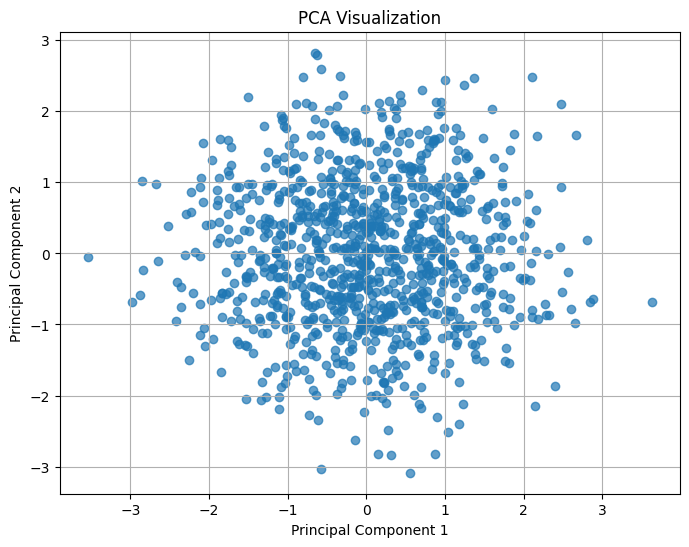

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    alpha=0.7
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid()
plt.show()


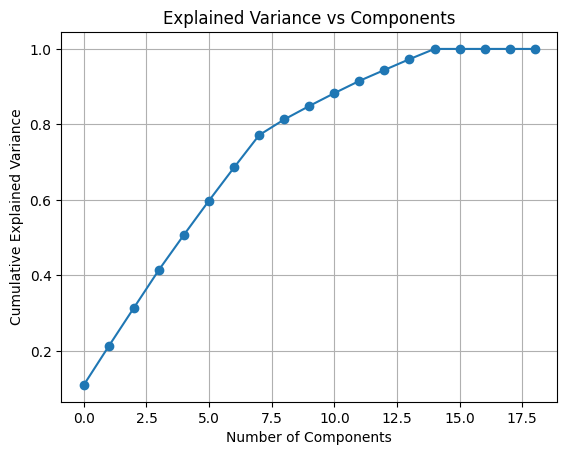

In [ ]:
pca_full = PCA()
pca_full.fit(X_processed)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.grid()
plt.show()

# Dimensional Reduction with PCA

🔹 STEP 0: What PCA Does (1-line)

PCA reduces the number of features while retaining maximum variance (information).

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving literacy_rate.csv to literacy_rate (2).csv


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('literacy_rate.csv')
df.head()


,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,adult_education_programs,language_diversity,region_type,government_stability,literacy_rate_percent
0,4.847706,70.937794,20098.745559,503.001686,0.526940,35.269097,90.755242,NaN,NaN,Bilingual,Least Developed,High,66.516441
1,7.281657,64.538697,50606.686295,737.794798,0.524418,NaN,90.197009,0.500205,Extensive,Multilingual,Least Developed,NaN,85.431091
2,3.833110,63.533592,53415.197757,NaN,0.855385,16.078349,60.915648,0.921771,NaN,Monolingual,Developing,Low,67.063415
3,NaN,37.964468,10943.100757,343.572155,0.864194,40.721066,28.890170,0.862589,Limited,NaN,Developing,High,58.288996
4,2.697866,74.761894,26233.323359,753.260001,0.932270,38.795291,72.056473,0.682091,Extensive,NaN,Least Developed,Low,87.016369


In [ ]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df = numeric_df.fillna(numeric_df.mean())
numeric_df.head()


,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,literacy_rate_percent
0,4.847706,70.937794,20098.745559,503.001686,0.526940,35.269097,90.755242,0.750029,66.516441
1,7.281657,64.538697,50606.686295,737.794798,0.524418,32.969899,90.197009,0.500205,85.431091
2,3.833110,63.533592,53415.197757,524.953319,0.855385,16.078349,60.915648,0.921771,67.063415
3,5.009396,37.964468,10943.100757,343.572155,0.864194,40.721066,28.890170,0.862589,58.288996
4,2.697866,74.761894,26233.323359,753.260001,0.932270,38.795291,72.056473,0.682091,87.016369


Apply PCA

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


In [ ]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


Create PCA DataFrame

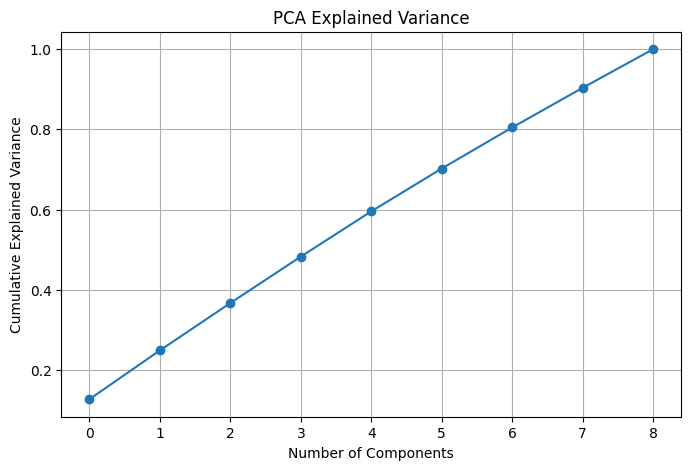

In [ ]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


visulaize PCA result

In [ ]:
pca_optimal = PCA(n_components=0.95)
reduced_data = pca_optimal.fit_transform(scaled_data)

print("Original Shape:", scaled_data.shape)
print("Reduced Shape:", reduced_data.shape)


Original Shape: (1000, 9)
Reduced Shape: (1000, 9)


In [ ]:

reduced_df = pd.DataFrame(reduced_data)
reduced_df.head()


,0,1,2,3,4,5,6,7,8
0,-1.026725,-0.482647,-1.656459,-0.775122,-0.365907,-0.023264,-0.850894,0.444025,0.554872
1,0.155008,0.922148,-2.243484,-0.932755,0.526955,1.828798,-0.745753,-0.984741,-0.550796
2,0.290214,-0.442393,1.371692,0.276464,0.901076,0.947615,-0.865744,1.749774,0.014985
3,-0.245753,-0.532824,0.843738,0.642564,0.054894,-1.637013,1.046121,-0.217335,1.344550
4,-0.285017,-0.086132,0.360019,-0.764297,-1.451939,0.848252,1.345339,0.817226,-0.922937


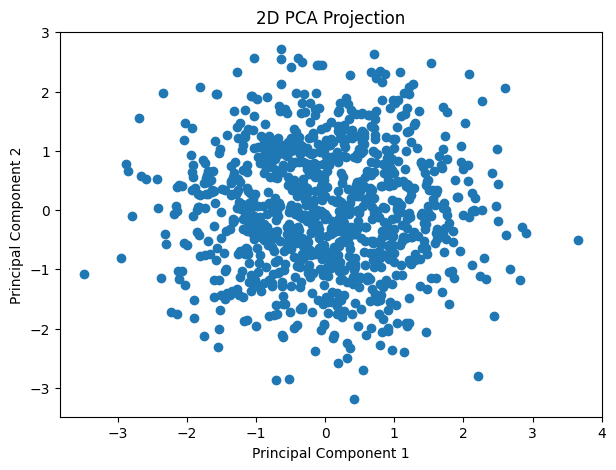

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(reduced_df[0], reduced_df[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


In [188]:
df = df.dropna(subset=["literacy_rate_percent"])
X = df.select_dtypes(include=np.number).drop(columns=["literacy_rate_percent"])
X = X.fillna(X.mean())
y = df["literacy_rate_percent"]

In [196]:
import statsmodels.api as sm
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     literacy_rate_percent   R-squared:                       0.009
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     1.122
Date:                   Wed, 11 Feb 2026   Prob (F-statistic):              0.345
Time:                           08:27:10   Log-Likelihood:                -3874.3
No. Observations:                    948   AIC:                             7767.
Df Residuals:                        939   BIC:                             7810.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------